In [1]:
#necessary libraries
import pandas as pd 
import pandas_datareader.data as web
from fbprophet import Prophet
import matplotlib
import numpy as np 
import scipy as sp 
import datetime as dt

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,12,31)

df = web.DataReader('MSFT', 'yahoo', start_date, end_date)
print(df.head())
print(df.shape)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-01-02  47.419998  46.540001  46.660000  46.759998  27913900.0  42.262299
2015-01-05  46.730000  46.250000  46.369999  46.330002  39673900.0  41.873657
2015-01-06  46.750000  45.540001  46.380001  45.650002  36447900.0  41.259060
2015-01-07  46.459999  45.490002  45.980000  46.230000  29114100.0  41.783279
2015-01-08  47.750000  46.720001  46.750000  47.590000  29645200.0  43.012459
(1006, 6)


In [3]:
df = df.reset_index()

In [4]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
0,2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,42.262299,2015,1,2
1,2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.873657,2015,1,5
2,2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,41.259060,2015,1,6
3,2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.783279,2015,1,7
4,2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,43.012459,2015,1,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 10 columns):
Date         1006 non-null datetime64[ns]
High         1006 non-null float64
Low          1006 non-null float64
Open         1006 non-null float64
Close        1006 non-null float64
Volume       1006 non-null float64
Adj Close    1006 non-null float64
Year         1006 non-null int64
Month        1006 non-null int64
Day          1006 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 78.7 KB


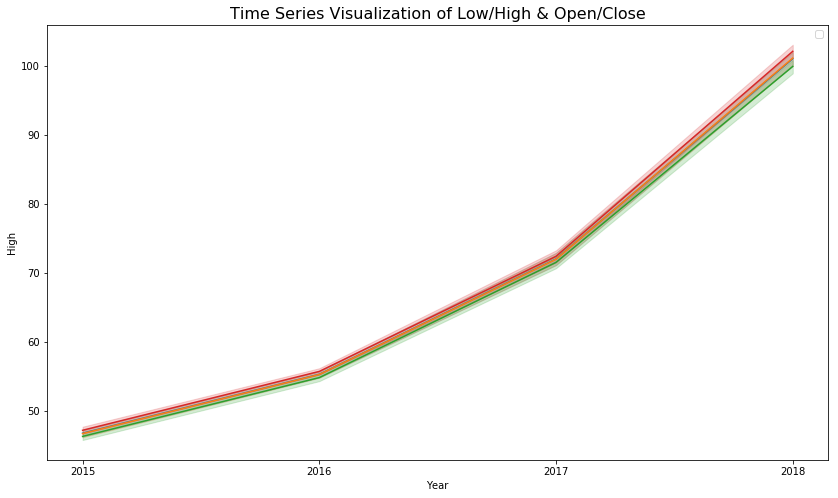

In [7]:
plt.subplots(figsize=(14,8))
plt.title('Time Series Visualization of Low/High & Open/Close', fontsize=16)
sns.lineplot(x='Year', y='Close', data=df)
sns.lineplot(x='Year', y='Open', data=df)
sns.lineplot(x='Year', y='Low', data=df)
sns.lineplot(x='Year', y='High', data=df)
plt.xticks([2015, 2016, 2017, 2018])
plt.legend()
plt.show()

In [8]:
#create a dataframe for facebook prophet api/model
data = df.drop(['Low', 'Open', 'Close','Adj Close', 'Volume', 'Year', 'Month', 'Day'], axis=1)

In [9]:
data.head()

,Date,High
0,2015-01-02,47.419998
1,2015-01-05,46.730000
2,2015-01-06,46.750000
3,2015-01-07,46.459999
4,2015-01-08,47.750000


In [10]:
data = data.rename(columns={'Date': 'ds', 'High': 'y'})
#data = data['ds'].astype('str')
data.head()

,ds,y
0,2015-01-02,47.419998
1,2015-01-05,46.730000
2,2015-01-06,46.750000
3,2015-01-07,46.459999
4,2015-01-08,47.750000


In [11]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/connerleavitt/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [12]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
1031,2019-01-26
1032,2019-01-27
1033,2019-01-28
1034,2019-01-29
1035,2019-01-30


In [13]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1031,2019-01-26,109.167815,106.880118,111.773685
1032,2019-01-27,109.065453,106.641128,111.608185
1033,2019-01-28,108.918927,106.514505,111.341393
1034,2019-01-29,108.850654,106.379580,111.480501
1035,2019-01-30,108.784354,106.275411,111.214736


In [20]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

TypeError: float() argument must be a string or a number, not 'datetime.datetime'

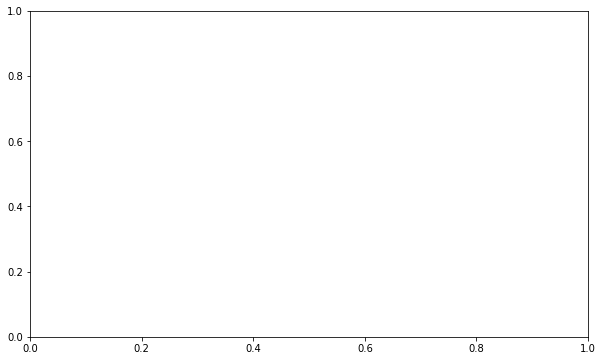

In [21]:
fig1 = model.plot(forecast)